In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    return (np.abs(array - value)).argmin()

In [22]:
# data = np.load('./data.npy')
x,y = np.mgrid(10,10)
data =np.zeros([100,100,100])
data[24, 24, : ] = 1.
data[25, 25, : ] = 1.
data[26, 26, : ] = 1.
print(data.sum())

print(x,y)

TypeError: 'OGridClass' object is not callable

In [6]:
data.shape

(100, 100, 100)

In [7]:
fs = 2.5e6  # sampling frequency, (Hz)
dx = 1      # spatial sampling step along X in (mm)
dy = 1      # spatial sampling step along Y in (mm)

In [8]:
y_max = dy * data.shape[0]  # mm
x_max = dx * data.shape[1]  # mm
t_max = data.shape[2] / fs  # s

In [9]:
y = np.linspace(0, y_max, data.shape[0])   # mm
x = np.linspace(0, x_max, data.shape[1])   # mm

yy, xx = np.meshgrid(y, x, indexing='ij')

<ipython-input-18-3c84faeac35e>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, data[:,time_stamp,:])


Text(0, 0.5, 'y, mm')

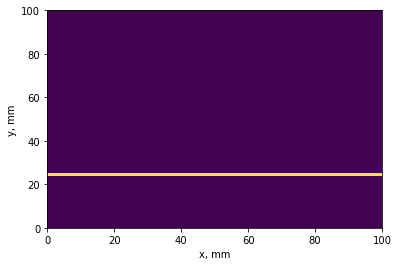

In [18]:
time_stamp = 24 # µs
plt.figure()
plt.pcolormesh(xx, yy, data[:,time_stamp,:])
plt.xlabel('x, mm')
plt.ylabel('y, mm')

In [19]:
spectrum_3d = np.fft.fftn(data)                            # Fourrier transform alon Y, X and T axes to obtain ky, kx, f

spectrum_3d_sh = np.fft.fftshift(spectrum_3d, axes=(0,1))  # Apply frequency shift along spatial dimentions so
                                                           # that zero-frequency component appears at the center of the spectrum

In [10]:
ky = np.linspace(-np.pi / y_max, np.pi / y_max, data.shape[0])  # wavenumber along Y axis (rad/mm)
kx = np.linspace(-np.pi / x_max, np.pi / x_max, data.shape[1])  # wavenumber along X axis (rad/mm)
f  = np.linspace(0, fs, data.shape[2])                          # frequency (Hz)

In [11]:
Ky, Kx = np.meshgrid(ky, kx, indexing='ij')

In [18]:
freq_to_observe = 40e3     # Hz
f_idx = find_nearest_idx(f, freq_to_observe)

Text(0, 0.5, 'ky, rad/mm')

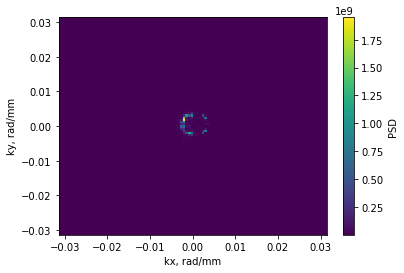

In [19]:
plt.figure()
psd = plt.pcolormesh(Kx, Ky, abs(spectrum_3d_sh[:,:,f_idx])**2)
cbar = plt.colorbar(psd, label='PSD')
plt.xlabel('kx, rad/mm')
plt.ylabel('ky, rad/mm')